In [2]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation
from sklearn.preprocessing import StandardScaler
import math

In [3]:
# loading our dataset: biodiversity project
# paper: https://doi.org/10.1080/0952813X.2021.1871972
# full dataset: https://data.mendeley.com/datasets/9x62992sw6/2
data = pd.read_csv('biodiversity-br.csv',)
data

FileNotFoundError: [Errno 2] No such file or directory: 'biodiversity.csv'

# Usando sklearn

In [4]:
# loading the necessary functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Perceptron

In [5]:
# creating train/test validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
y = data['classe']
X = data.drop(['classe'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42,
                                                 stratify=y, shuffle=True)

KeyError: 'classe'

In [6]:
#loading the classifier
clf = Perceptron(tol=1e-3, max_iter=100, eta0=0.5)

In [7]:
#modeling the problem
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [8]:
# lets check the performance of our model by classifying new examples
#Mean accuracy
clf.score(X_test, y_test)

NameError: name 'X_test' is not defined

In [ ]:
# Predicted labels
y_predicted = clf.predict(X_test)
y_predicted

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print("Confusion matrix")
print(cm)

Confusion matrix
[[ 4 41]
 [ 1 41]]


In [ ]:
cr = classification_report(y_test, y_predicted)
print("Classification report")
print(cr)

Classification report
              precision    recall  f1-score   support

           0       0.80      0.09      0.16        45
           1       0.50      0.98      0.66        42

    accuracy                           0.52        87
   macro avg       0.65      0.53      0.41        87
weighted avg       0.66      0.52      0.40        87



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay


In [ ]:
# creating k-fold validation
data = pd.read_csv('biodiversity-br.csv')
y = data['classe']
X = data.drop(['classe'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)


classifier = Perceptron(tol=1e-3, random_state=0)
lazy = KNeighborsClassifier(n_neighbors = 10)


In [ ]:
score_rna = cross_val_score(classifier, X_train, y_train, cv=10)
print("RNA score")
np.mean(score_rna)

RNA score


0.5154012654012654

In [ ]:
score_knn = cross_val_score(lazy, X_train, y_train, cv=10)
print("KNN score")
np.mean(score_knn)

KNN score


0.6233266733266734

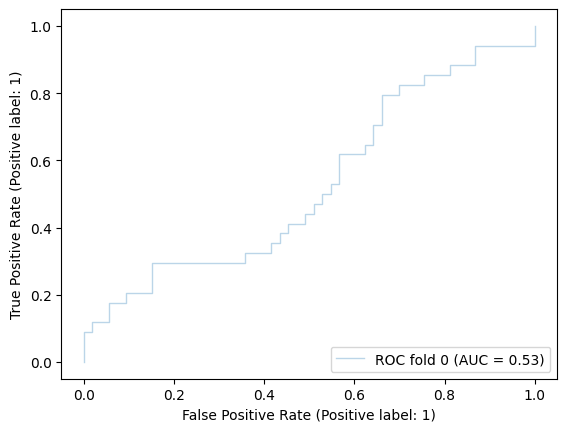

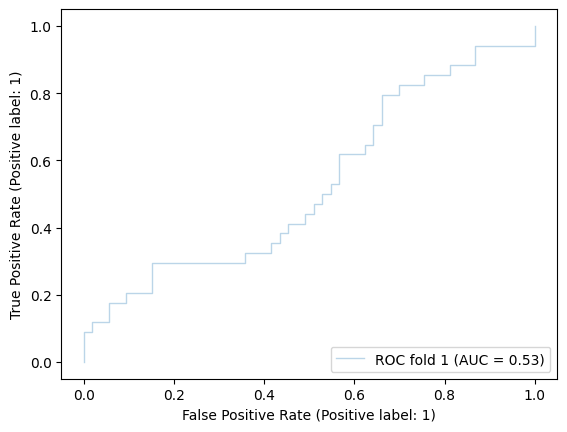

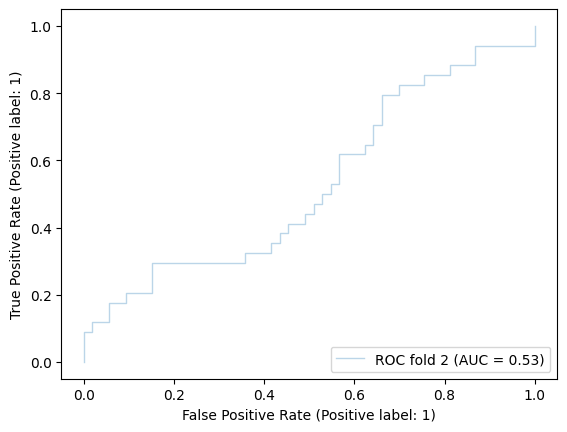

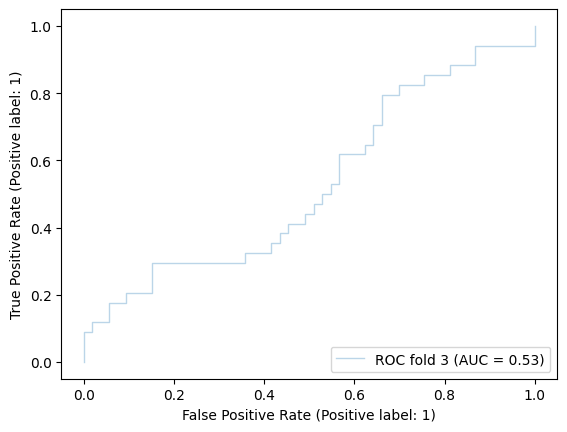

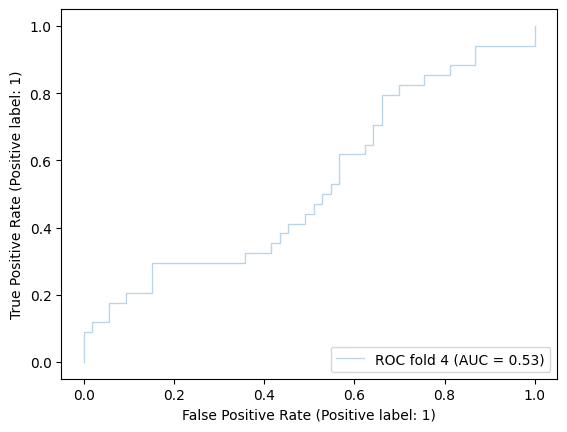

In [ ]:
cv = StratifiedKFold(n_splits=5)
classifier = Perceptron(tol=1e-3, random_state=0) #<---- Escolher o classificador

for fold, (train, test) in enumerate(cv.split(X, y)):
  classifier.fit(X_train, y_train) #<---- Escolher o classificador
  viz = RocCurveDisplay.from_estimator(
        classifier, #<---- Escolher o classificador
        X_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
    )

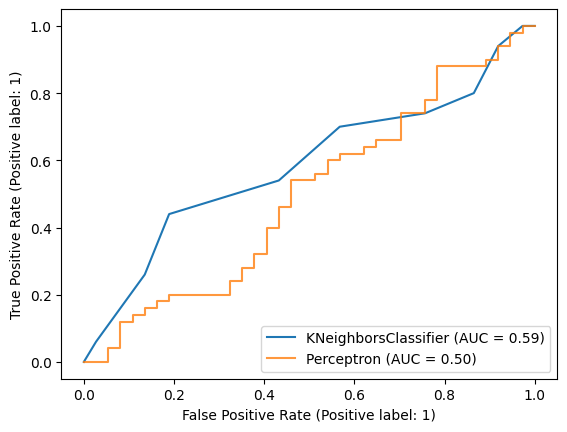

In [ ]:
#Checar as curvas de vários classificadores
classifier.fit(X_train, y_train)
lazy.fit(X_train, y_train)

lazy_disp = RocCurveDisplay.from_estimator(lazy, X_test, y_test)
ax = plt.gca()
classifier_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax, alpha=0.8)
#classifier_disp.plot(ax=ax, alpha=0.8)
plt.show()